# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [3]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print(f"Shapes of Dataframes are: \nHH_Income: {df_hh_income.shape}\nFatalities: {df_fatalities.shape}\nShare_Race_City: {df_share_race_city.shape}\nPCT_Completed_HS: {df_pct_completed_hs.shape}\nPCT_Poverty: {df_pct_poverty.shape}")

Shapes of Dataframes are: 
HH_Income: (29322, 3)
Fatalities: (2535, 14)
Share_Race_City: (29268, 7)
PCT_Completed_HS: (29329, 3)
PCT_Poverty: (29329, 3)


In [8]:
print(f"Columns are: \nHH_Income: {df_hh_income.columns}\nFatalities: {df_fatalities.columns}\nShare_Race_City: {df_share_race_city.columns}\nPCT_Completed_HS: {df_pct_completed_hs.columns}\nPCT_Poverty: {df_pct_poverty.columns}")

Columns are: 
HH_Income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Share_Race_City: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
PCT_Completed_HS: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
PCT_Poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


In [9]:
print(f"NaN Values in the DataFrames:")
print(f"Household Income DataFrame: {df_hh_income.isna().any().any()}")
print(f"Fatalities DataFrame: {df_fatalities.isna().any().any()}")
print(f"Share Race City DataFrame: {df_share_race_city.isna().any().any()}")
print(f"Percentage Completed High School DataFrame: {df_pct_completed_hs.isna().any().any()}")
print(f"Percentage Poverty DataFrame: {df_pct_poverty.isna().any().any()}")

NaN Values in the DataFrames:
Household Income DataFrame: True
Fatalities DataFrame: True
Share Race City DataFrame: False
Percentage Completed High School DataFrame: False
Percentage Poverty DataFrame: False


In [10]:
print("Checking for Duplicates in DataFrames:")
print(f"Household Income DataFrame - Duplicates: {df_hh_income.duplicated().any()}")
print(f"Fatalities DataFrame - Duplicates: {df_fatalities.duplicated().any()}")
print(f"Share Race City DataFrame - Duplicates: {df_share_race_city.duplicated().any()}")
print(f"Percentage Completed High School DataFrame - Duplicates: {df_pct_completed_hs.duplicated().any()}")
print(f"Percentage Poverty DataFrame - Duplicates: {df_pct_poverty.duplicated().any()}")

Checking for Duplicates in DataFrames:
Household Income DataFrame - Duplicates: False
Fatalities DataFrame - Duplicates: False
Share Race City DataFrame - Duplicates: False
Percentage Completed High School DataFrame - Duplicates: False
Percentage Poverty DataFrame - Duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
print("Missing Values Summary:")
print(df_hh_income.isna().sum(), "\n")
print(df_fatalities.isna().sum(), "\n")
print(df_share_race_city.isna().sum(), "\n")
print(df_pct_completed_hs.isna().sum(), "\n")
print(df_pct_poverty.isna().sum(), "\n")

Missing Values Summary:
Geographic Area     0
City                0
Median Income      51
dtype: int64 

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64 

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64 

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 

Geographic Area    0
City               0
poverty_rate       0
dtype: int64 



In [12]:
print("Checking for Duplicates:")
print(f"Household Income DataFrame - Duplicates: {df_hh_income.duplicated().sum()}")
print(f"Fatalities DataFrame - Duplicates: {df_fatalities.duplicated().sum()}")
print(f"Share Race City DataFrame - Duplicates: {df_share_race_city.duplicated().sum()}")
print(f"Percentage Completed High School DataFrame - Duplicates: {df_pct_completed_hs.duplicated().sum()}")
print(f"Percentage Poverty DataFrame - Duplicates: {df_pct_poverty.duplicated().sum()}")

Checking for Duplicates:
Household Income DataFrame - Duplicates: 0
Fatalities DataFrame - Duplicates: 0
Share Race City DataFrame - Duplicates: 0
Percentage Completed High School DataFrame - Duplicates: 0
Percentage Poverty DataFrame - Duplicates: 0


In [13]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)

In [14]:
df_hh_income.drop_duplicates(inplace=True)
df_fatalities.drop_duplicates(inplace=True)
df_share_race_city.drop_duplicates(inplace=True)
df_pct_completed_hs.drop_duplicates(inplace=True)
df_pct_poverty.drop_duplicates(inplace=True)

In [15]:
print("Missing Values After Cleaning:")
print(df_hh_income.isna().sum(), "\n")
print(df_fatalities.isna().sum(), "\n")
print(df_share_race_city.isna().sum(), "\n")
print(df_pct_completed_hs.isna().sum(), "\n")
print(df_pct_poverty.isna().sum(), "\n")

Missing Values After Cleaning:
Geographic Area    0
City               0
Median Income      0
dtype: int64 

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64 

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64 

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 

Geographic Area    0
City               0
poverty_rate       0
dtype: int64 



In [16]:
print("Duplicates After Cleaning:")
print(f"Household Income DataFrame - Duplicates: {df_hh_income.duplicated().sum()}")
print(f"Fatalities DataFrame - Duplicates: {df_fatalities.duplicated().sum()}")
print(f"Share Race City DataFrame - Duplicates: {df_share_race_city.duplicated().sum()}")
print(f"Percentage Completed High School DataFrame - Duplicates: {df_pct_completed_hs.duplicated().sum()}")
print(f"Percentage Poverty DataFrame - Duplicates: {df_pct_poverty.duplicated().sum()}")

Duplicates After Cleaning:
Household Income DataFrame - Duplicates: 0
Fatalities DataFrame - Duplicates: 0
Share Race City DataFrame - Duplicates: 0
Percentage Completed High School DataFrame - Duplicates: 0
Percentage Poverty DataFrame - Duplicates: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

In [18]:
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
state_poverty_df = state_poverty.reset_index()

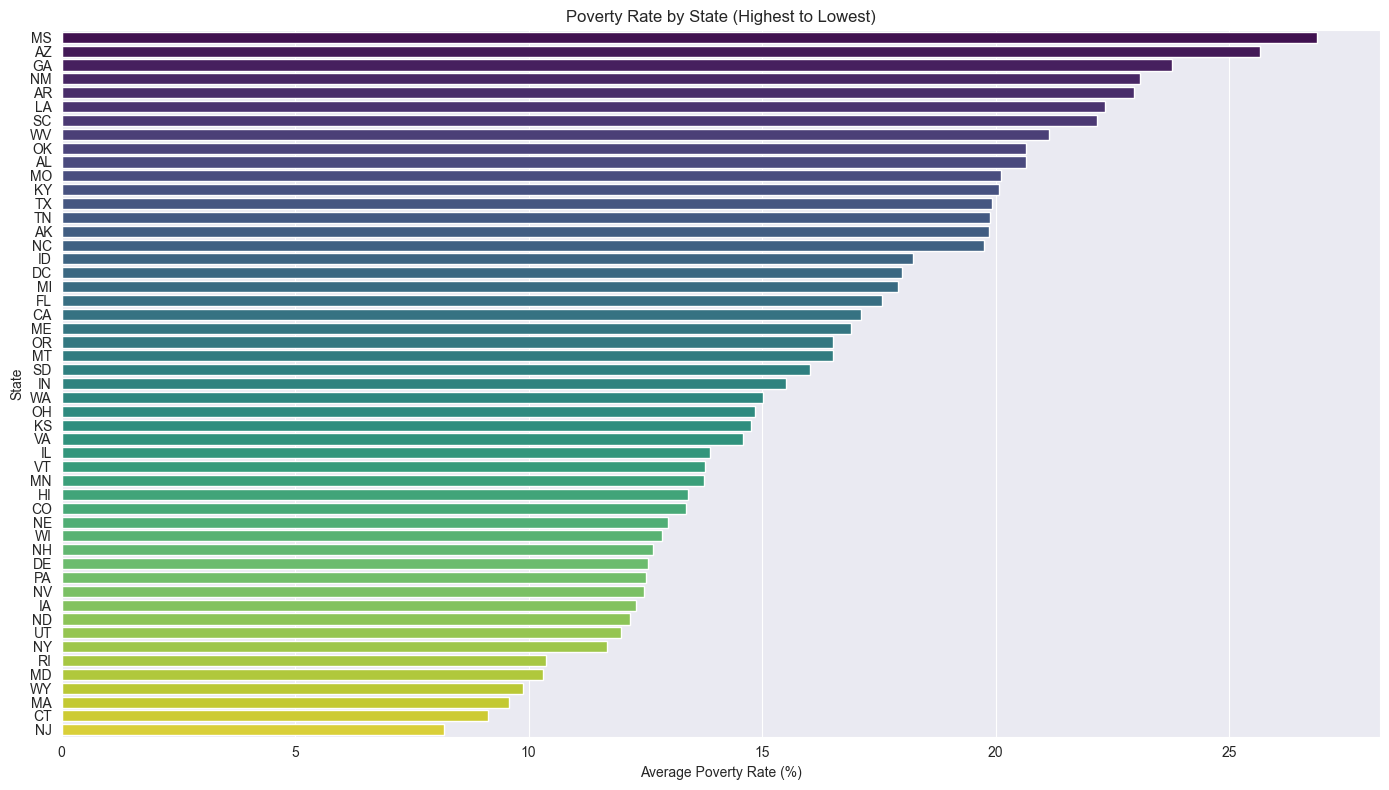

State with the highest poverty rate: MS (26.88%)
State with the lowest poverty rate: NJ (8.19%)


In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(data=state_poverty_df, x='poverty_rate', y='Geographic Area', hue='Geographic Area', palette='viridis')

plt.xlabel('Average Poverty Rate (%)')
plt.ylabel('State')
plt.title('Poverty Rate by State (Highest to Lowest)')
plt.tight_layout()

plt.show()

highest_poverty_state = state_poverty.idxmax()
lowest_poverty_state = state_poverty.idxmin()
print(f"State with the highest poverty rate: {highest_poverty_state} ({state_poverty.max():.2f}%)")
print(f"State with the lowest poverty rate: {lowest_poverty_state} ({state_poverty.min():.2f}%)")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [20]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

state_graduation_rate = (
    df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
)

state_graduation_rate_df = state_graduation_rate.reset_index()

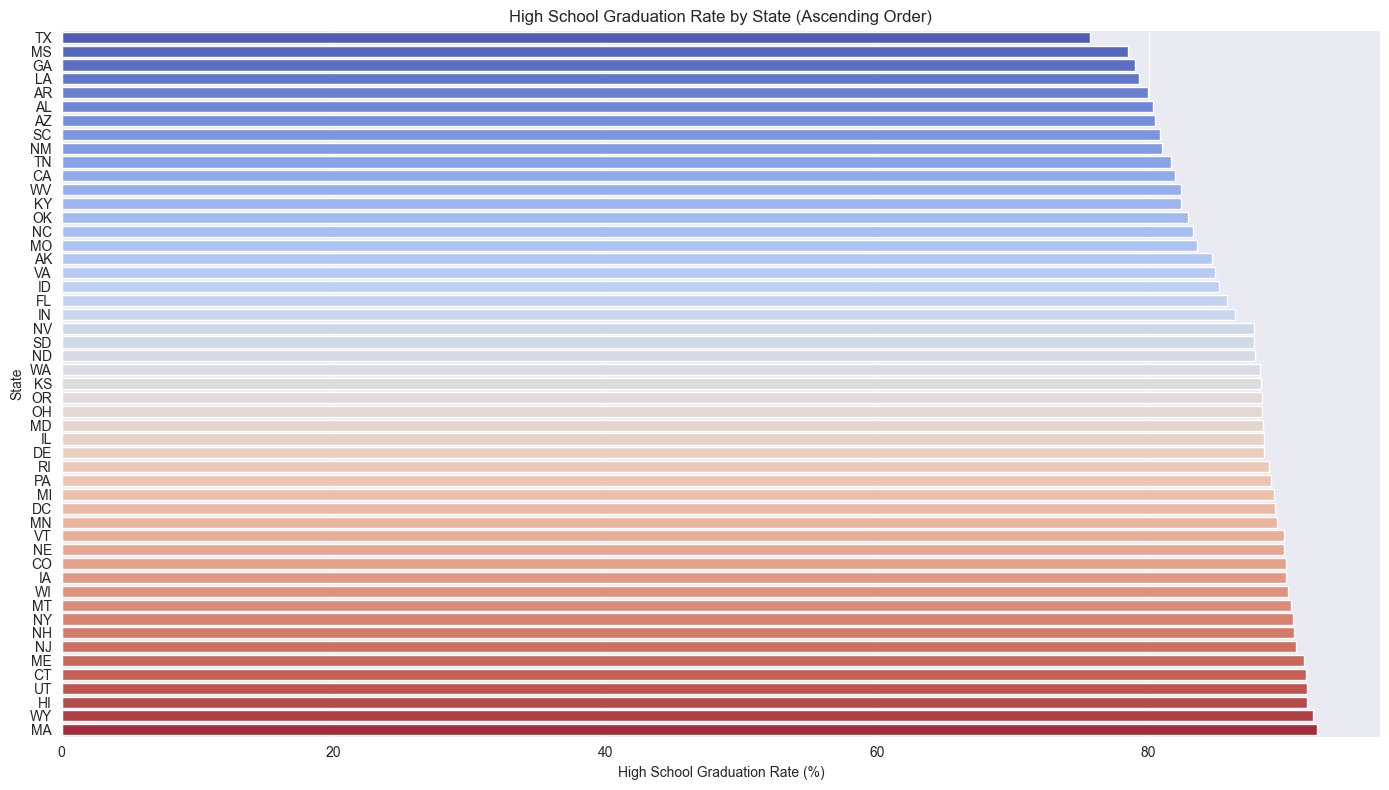

State with the lowest graduation rate: TX (75.69%)
State with the highest graduation rate: MA (92.40%)


In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_graduation_rate_df, 
    x='percent_completed_hs', 
    y='Geographic Area', 
    hue='Geographic Area',
    palette='coolwarm'
)

plt.xlabel('High School Graduation Rate (%)')
plt.ylabel('State')
plt.title('High School Graduation Rate by State (Ascending Order)')
plt.tight_layout()

plt.show()

lowest_graduation_state = state_graduation_rate.idxmin()
highest_graduation_state = state_graduation_rate.idxmax()

print(f"State with the lowest graduation rate: {lowest_graduation_state} ({state_graduation_rate.min():.2f}%)")
print(f"State with the highest graduation rate: {highest_graduation_state} ({state_graduation_rate.max():.2f}%)")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [22]:
merged_data = pd.merge(
    df_pct_poverty[['Geographic Area', 'poverty_rate']],
    df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']],
    on='Geographic Area',
    how='inner'
)

merged_data['poverty_rate'] = pd.to_numeric(merged_data['poverty_rate'], errors='coerce')
merged_data['percent_completed_hs'] = pd.to_numeric(merged_data['percent_completed_hs'], errors='coerce')

merged_data.dropna(subset=['poverty_rate', 'percent_completed_hs'], inplace=True)

merged_data.sort_values(by='Geographic Area', inplace=True, ignore_index=True)

print(merged_data.head())

  Geographic Area  poverty_rate  percent_completed_hs
0              AK          4.50                100.00
1              AK         42.00                 96.10
2              AK         42.00                 90.20
3              AK         42.00                 94.40
4              AK         42.00                 97.30


In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 10))

ax1.plot(
    merged_data['Geographic Area'],
    merged_data['poverty_rate'],
    color='red',
    marker='o',
    linestyle='-',
    label='Poverty Rate'
)
ax1.set_ylabel('Poverty Rate (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')

ax1.set_xlabel('State', fontsize=12)
ax1.set_xticks(range(len(merged_data['Geographic Area'])))
ax1.set_xticklabels(merged_data['Geographic Area'], rotation=90, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(
    merged_data['Geographic Area'],
    merged_data['percent_completed_hs'],
    color='blue',
    marker='o',
    linestyle='--',
    label='High School Graduation Rate'
)
ax2.set_ylabel('High School Graduation Rate (%)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

ax1.set_title(
    'Relationship between Poverty Rates and High School Graduation Rates by State',
    fontsize=14,
    pad=15
)

plt.tight_layout()

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
merged_data['poverty_rate'] = pd.to_numeric(merged_data['poverty_rate'], errors='coerce')
merged_data['percent_completed_hs'] = pd.to_numeric(merged_data['percent_completed_hs'], errors='coerce')

merged_data.dropna(inplace=True)
print(merged_data.head())

In [ ]:
sns.jointplot(
    data=merged_data,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',  
    fill=True,  
    space=0,
    cmap='coolwarm'
)

plt.suptitle('Relationship between Poverty Rates and High School Graduation Rates', y=1.02)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.regplot(
    data=merged_data,
    x='poverty_rate',
    y='percent_completed_hs',
    color='blue',
    marker='o',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red', 'lw': 2},
)

plt.title('Linear Regression: Poverty Rate vs High School Graduation Rate', fontsize=16, pad=15)
plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('High School Graduation Rate (%)', fontsize=12)

plt.tight_layout()
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [25]:
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

df_share_race_city[race_columns] = df_share_race_city[race_columns].apply(pd.to_numeric, errors='coerce')

df_share_race_city.loc[:, race_columns] = df_share_race_city[race_columns].fillna(0)

race_data = df_share_race_city.groupby('Geographic area')[race_columns].mean().reset_index()

print(race_data.head())

  Geographic area  share_white  share_black  share_native_american  \
0              AK        45.26         0.56                  45.48   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.54         2.68                   1.72   

   share_asian  share_hispanic  
0         1.38            2.13  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.54           29.51  


In [26]:
states = race_data['Geographic area']
white = race_data['share_white']
black = race_data['share_black']
native_american = race_data['share_native_american']
asian = race_data['share_asian']
hispanic = race_data['share_hispanic']

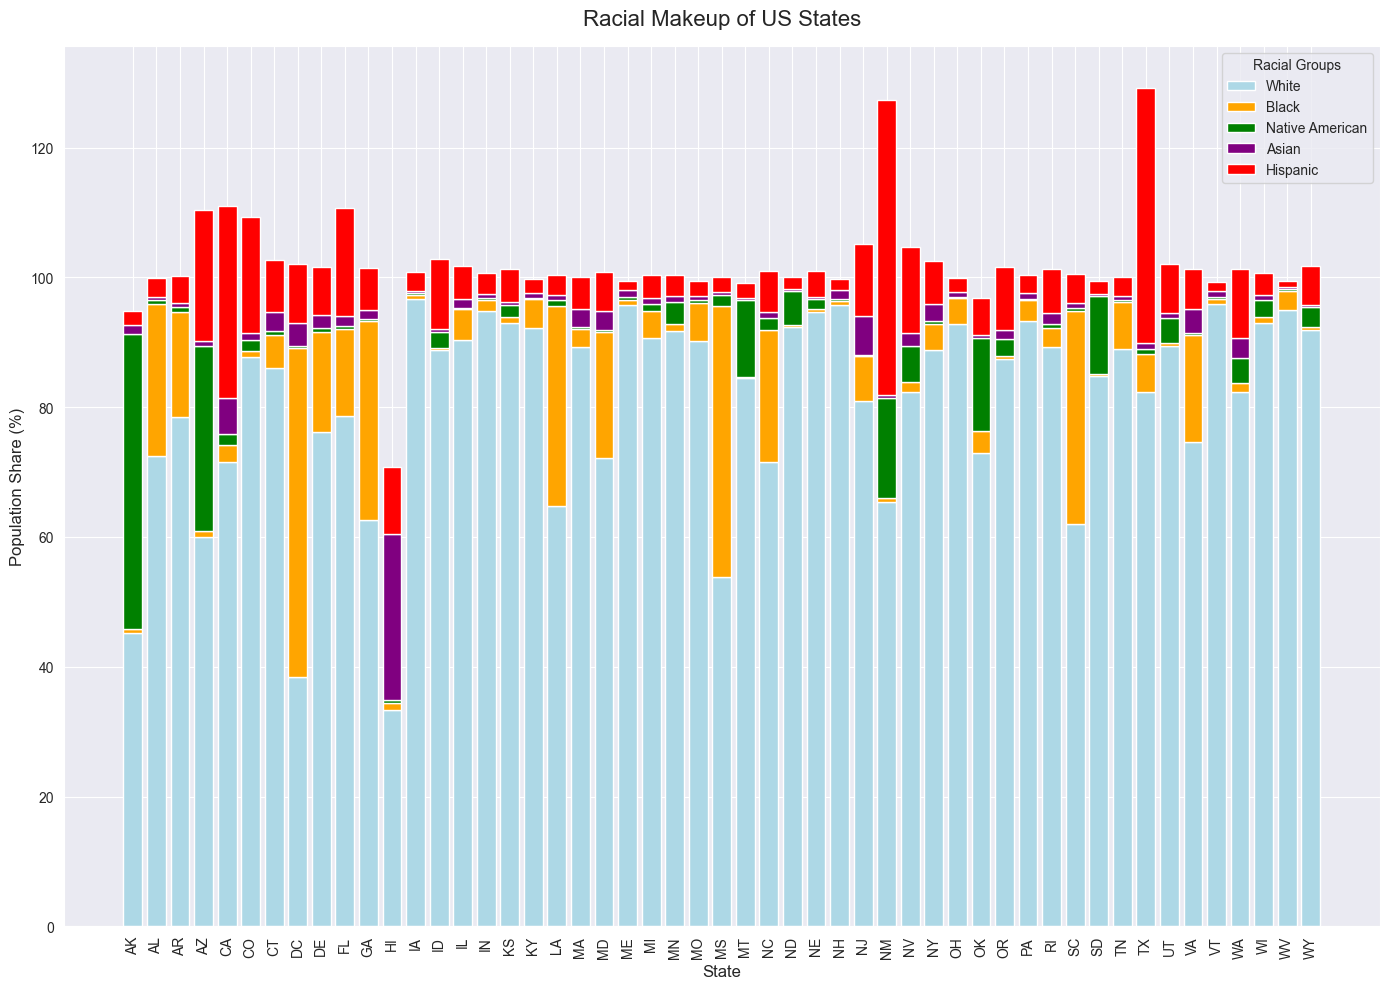

In [27]:
bar_width = 0.8
indices = np.arange(len(states))

plt.figure(figsize=(14, 10))

plt.bar(indices, white, bar_width, label='White', color='lightblue')
plt.bar(indices, black, bar_width, bottom=white, label='Black', color='orange')
plt.bar(indices, native_american, bar_width, bottom=white + black, label='Native American', color='green')
plt.bar(indices, asian, bar_width, bottom=white + black + native_american, label='Asian', color='purple')
plt.bar(indices, hispanic, bar_width, bottom=white + black + native_american + asian, label='Hispanic', color='red')

plt.title('Racial Makeup of US States', fontsize=16, pad=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population Share (%)', fontsize=12)
plt.xticks(indices, states, rotation=90, fontsize=10)
plt.legend(title='Racial Groups', fontsize=10)

plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [28]:
race_counts = df_fatalities['race'].value_counts()

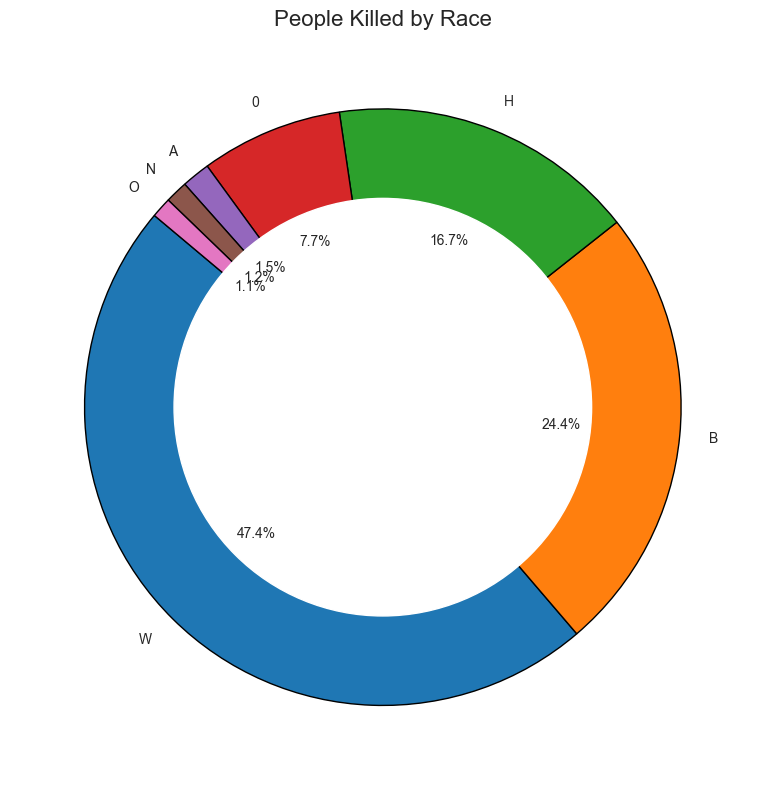

In [30]:
plt.figure(figsize=(8,8))
colors = plt.cm.tab10.colors
plt.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(center_circle)

plt.title('People Killed by Race', fontsize=16)

plt.tight_layout()
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [31]:
gender_counts = df_fatalities['gender'].value_counts()

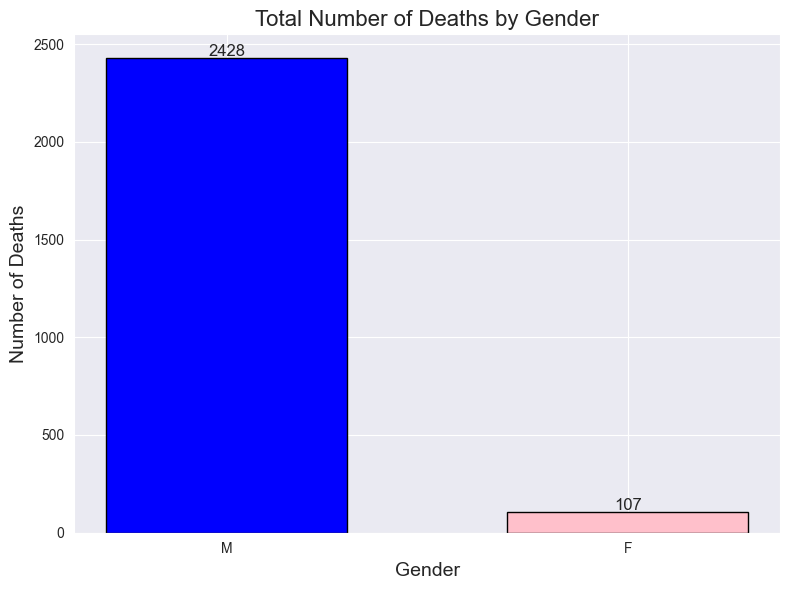

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(
    gender_counts.index, 
    gender_counts.values, 
    color=['blue', 'pink'], 
    edgecolor='black', 
    width=0.6
)

plt.title('Total Number of Deaths by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)

for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [33]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

In [34]:
df_fatalities_cleaned = df_fatalities.dropna(subset=['age', 'manner_of_death'])

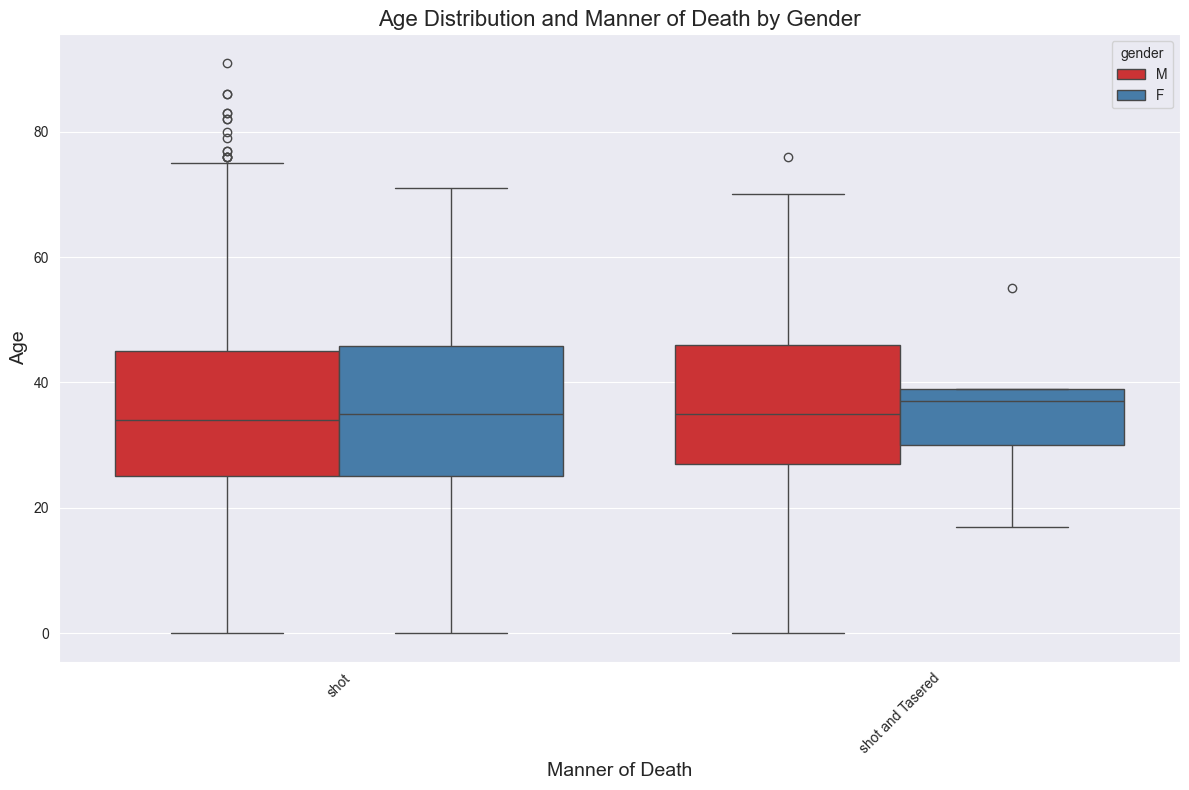

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='manner_of_death', 
    y='age', 
    hue='gender', 
    data=df_fatalities_cleaned, 
    palette='Set1'
)

plt.title('Age Distribution and Manner of Death by Gender', fontsize=16)
plt.xlabel('Manner of Death', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [39]:
df_fatalities['armed'] = df_fatalities['armed'].fillna('Unarmed')

weapon_counts = df_fatalities['armed'].value_counts()
print(weapon_counts.head())

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
Name: count, dtype: int64


In [46]:
weapon_counts_df = weapon_counts.reset_index()
weapon_counts_df.columns = ['Weapon Type', 'Number of Killings']

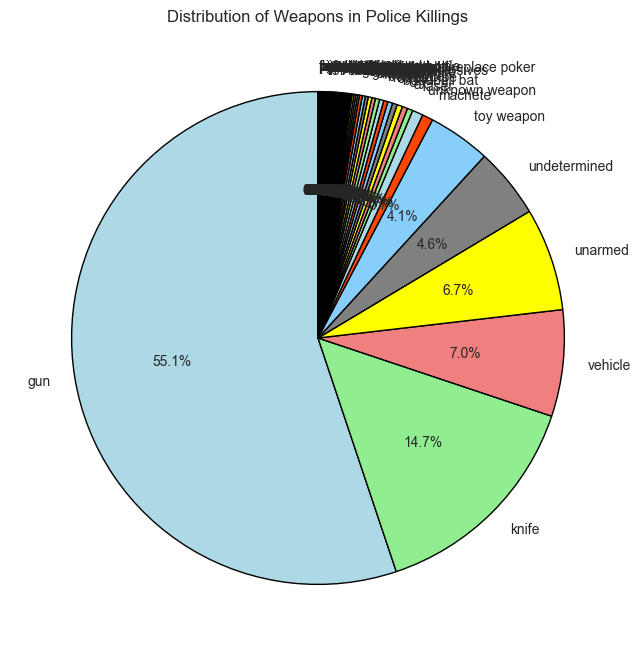

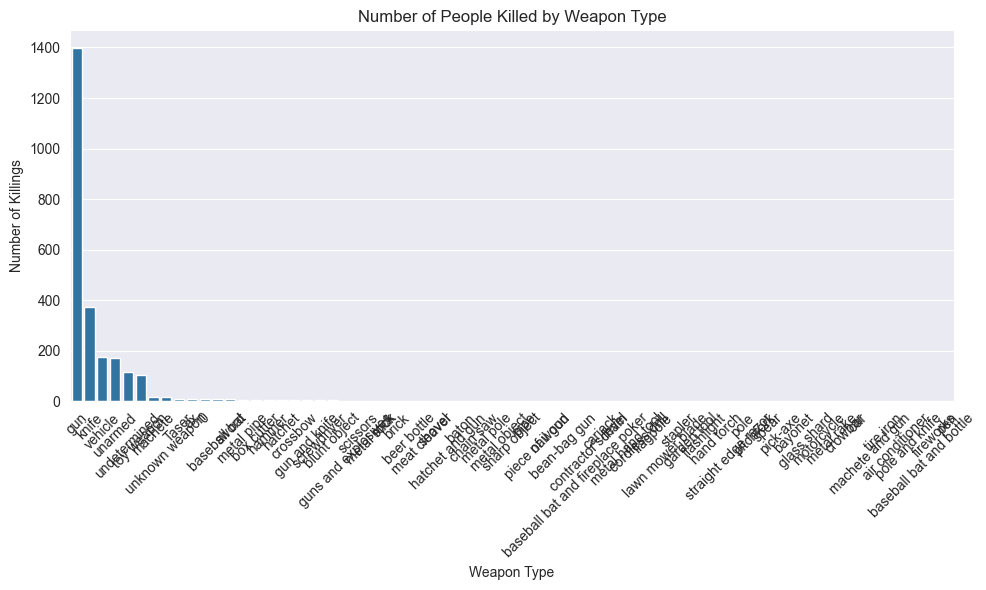

In [47]:
plt.figure(figsize=(8, 8))
weapon_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'lightcoral', 'yellow', 'gray', 'lightskyblue', 'orangered'],
    wedgeprops={'edgecolor': 'black'} 
)
plt.title('Distribution of Weapons in Police Killings')
plt.ylabel('')  
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=weapon_counts.index, 
    y=weapon_counts.values,
    data=weapon_counts_df
)
plt.title('Number of People Killed by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [50]:
armed_percentage = (weapon_counts['gun'] / weapon_counts.sum()) * 100
unarmed_percentage = (weapon_counts['unarmed'] / weapon_counts.sum()) * 100

print(f"Percentage of people killed with a gun: {armed_percentage:.2f}%")
print(f"Percentage of people killed who were unarmed: {unarmed_percentage:.2f}%")

Percentage of people killed with a gun: 55.15%
Percentage of people killed who were unarmed: 6.75%


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [51]:
under_25_fatalities = df_fatalities[df_fatalities['age'] < 25]
total_fatalities = df_fatalities.shape[0]
fatalities_under_25 = under_25_fatalities.shape[0]
percentage_under_25 = (fatalities_under_25 / total_fatalities) * 100
print(f"Percentage of people killed under 25 years old: {percentage_under_25:.2f}%")

Percentage of people killed under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

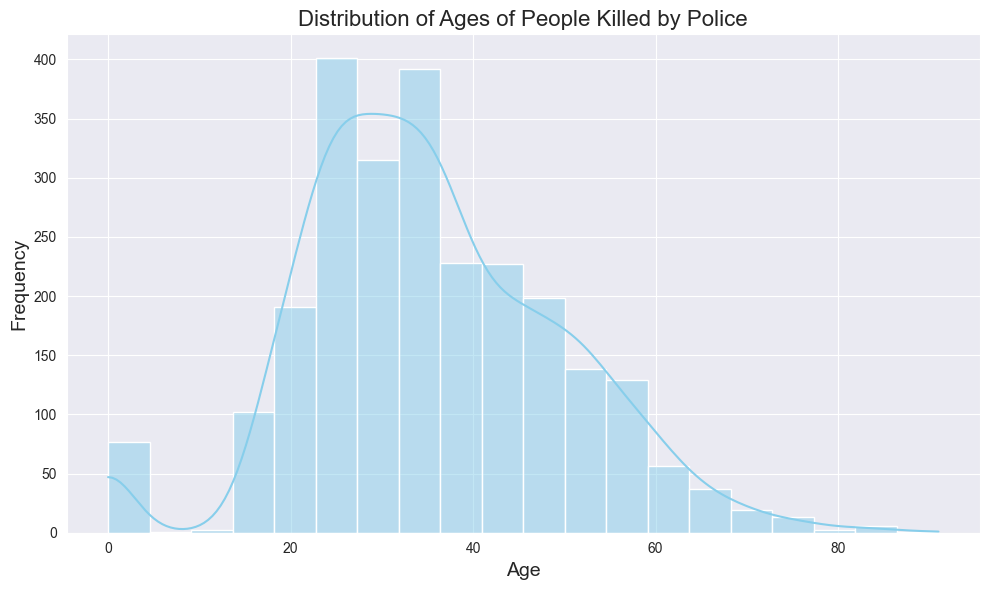

In [52]:
df_fatalities_cleaned = df_fatalities.dropna(subset=['age'])

plt.figure(figsize=(10, 6))

sns.histplot(df_fatalities_cleaned['age'], kde=True, bins=20, color='skyblue')

plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

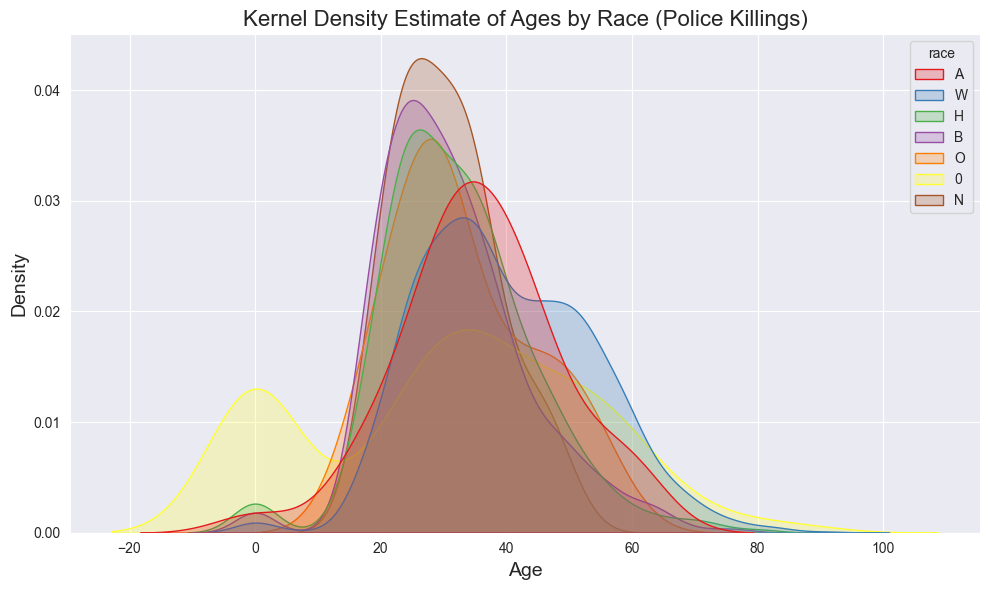

In [53]:
df_fatalities_cleaned = df_fatalities.dropna(subset=['age', 'race'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_fatalities_cleaned, x='age', hue='race', fill=True, common_norm=False, palette='Set1')

plt.title('Kernel Density Estimate of Ages by Race (Police Killings)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [54]:
race_counts = df_fatalities['race'].value_counts()

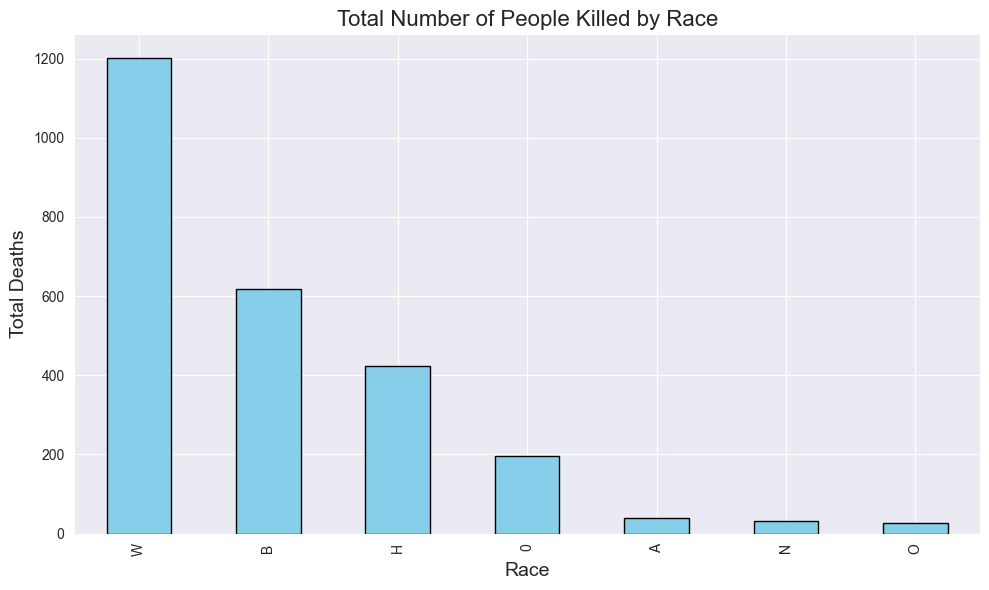

In [55]:
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Number of People Killed by Race', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [56]:
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()
total_fatalities = len(df_fatalities)

In [57]:
percentage_mental_illness = (mental_illness_count / total_fatalities) * 100
print(f"Percentage of people killed by police with mental illness: {percentage_mental_illness:.2f}%")

Percentage of people killed by police with mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [58]:
city_killings = df_fatalities['city'].value_counts().head(10)

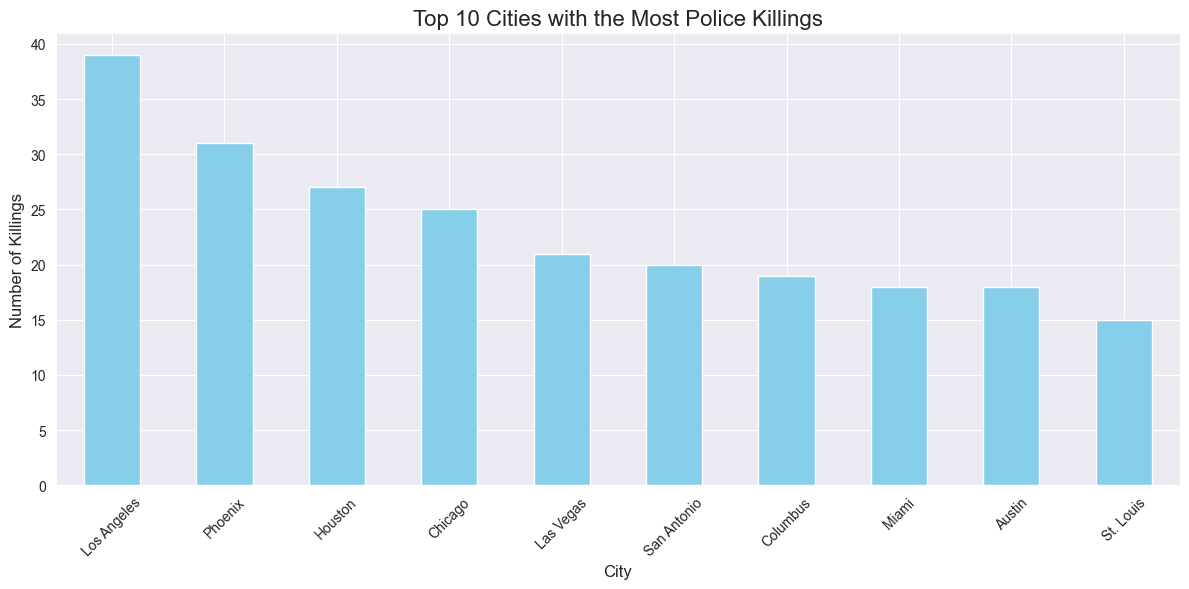

In [59]:
plt.figure(figsize=(12, 6))
city_killings.plot(kind='bar', color='skyblue')

plt.title('Top 10 Cities with the Most Police Killings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Killings', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [67]:
def clean_city_name(city_name):
    suffixes = [' city', ' town', ' cdp'] 
    city_name = city_name.lower().strip()
    for suffix in suffixes:
        if city_name.endswith(suffix):
            city_name = city_name[:-len(suffix)].strip()
    return city_name

df_share_race_city['City'] = df_share_race_city['City'].apply(clean_city_name)

print("Cleaned City Names in df_share_race_city (first 10):")
print(df_share_race_city['City'].unique()[:10])

df_fatalities['city'] = df_fatalities['city'].str.strip().str.lower()

top_10_cities = df_fatalities['city'].value_counts().head(10).index
df_share_race_top_10 = df_share_race_city[df_share_race_city['City'].isin(top_10_cities)]

print("\nFiltered df_share_race_top_10 (first few rows):")
print(df_share_race_top_10.head())

race_fatalities = df_fatalities[df_fatalities['city'].isin(top_10_cities)].groupby(['city', 'race']).size().unstack(fill_value=0)

race_fatalities = race_fatalities.reset_index().merge(df_share_race_top_10, left_on='city', right_on='City')

race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_fatality_rate = race_fatalities[race_columns].div(race_fatalities['share_white'], axis=0)

print(race_fatality_rate.head())

Cleaned City Names in df_share_race_city (first 10):
['abanda' 'abbeville' 'adamsville' 'addison' 'akron' 'alabaster'
 'albertville' 'alexander city' 'alexandria' 'aliceville']

Filtered df_share_race_top_10 (first few rows):
     Geographic area     City  share_white  share_black  \
712               AK  houston        82.20         0.40   
1161              AZ    miami        73.70         0.30   
1201              AZ  phoenix        65.90         6.50   
1404              AR   austin        94.20         2.00   
1628              AR  houston        98.80         0.00   

      share_native_american  share_asian  share_hispanic  
712                    6.70         0.60            3.30  
1161                   2.30         0.20           56.00  
1201                   2.20         3.20           40.80  
1404                   0.30         0.40            4.30  
1628                   0.00         0.00            0.60  
   share_white  share_black  share_native_american  share_asian  

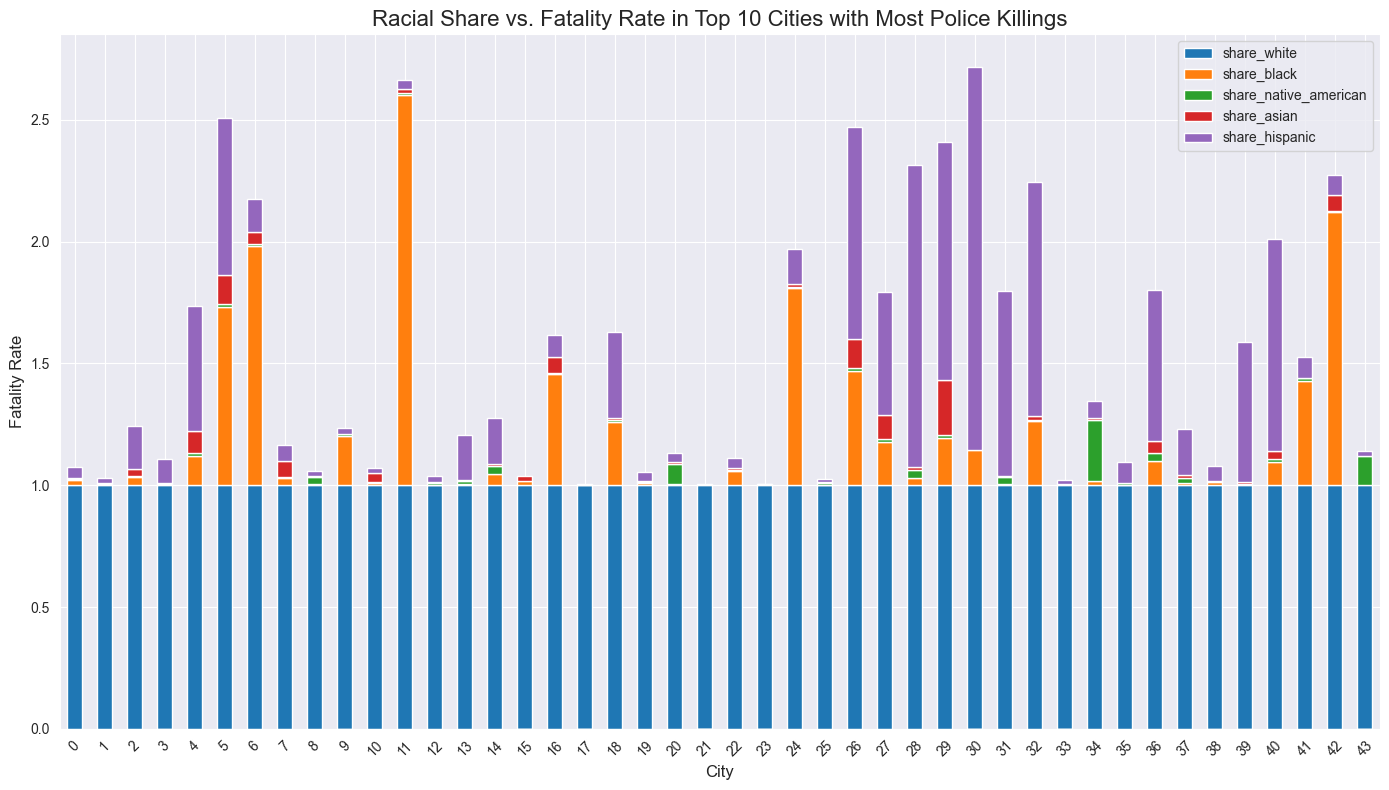

In [68]:
race_fatality_rate.plot(kind='bar', figsize=(14, 8), stacked=True)

plt.title('Racial Share vs. Fatality Rate in Top 10 Cities with Most Police Killings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Fatality Rate', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [78]:
state_killings = df_fatalities['state'].value_counts().reset_index()
state_killings.columns = ['state', 'killings']
state_killings['state'] = state_killings['state'].str.upper()

In [80]:
fig = px.choropleth(
    state_killings,
    locations='state',
    color='killings',
    color_continuous_scale="Viridis",
    locationmode='USA-states',
    labels={'state': 'State', 'killings': 'Police Killings'},
    title="Police Killings by State in the US"
)

fig.update_geos(
    scope='north america',  # Set to "north america" for North America, or "south america" for South America
    projection_type='mercator', 
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray"
)

# Display the plot
fig.show()

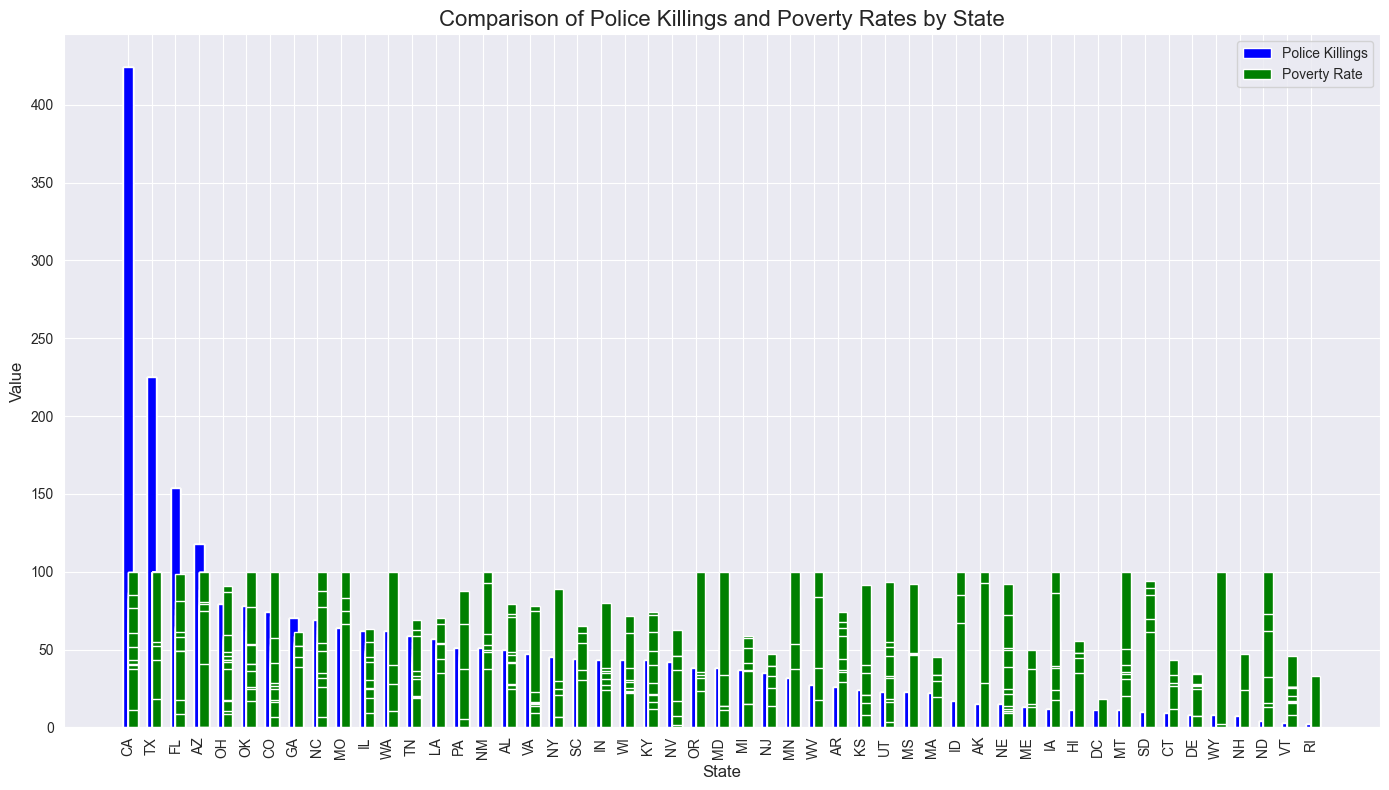

In [83]:
merged_data = pd.merge(state_killings, df_pct_poverty, left_on='state', right_on='Geographic Area')

merged_data_sorted = merged_data.sort_values(by='killings', ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(merged_data_sorted['state'], merged_data_sorted['killings'], width=0.4, label='Police Killings', align='center', color='blue')

ax.bar(merged_data_sorted['state'], merged_data_sorted['poverty_rate'], width=0.4, label='Poverty Rate', align='edge', color='green')

ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Comparison of Police Killings and Poverty Rates by State', fontsize=16)

ax.legend(loc='upper right')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [85]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%m/%d/%y', errors='coerce')


In [84]:
df_fatalities['year'] = df_fatalities['date'].dt.year

In [86]:
fatalities_per_year = df_fatalities['year'].value_counts().sort_index()

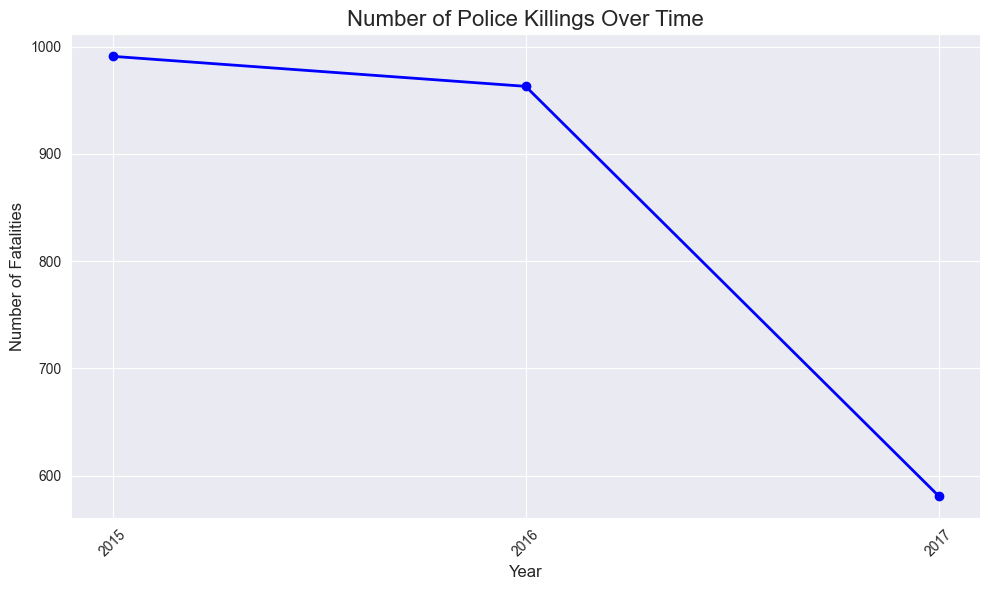

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.title('Number of Police Killings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.grid(True)
plt.xticks(fatalities_per_year.index, rotation=45)
plt.tight_layout()

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).